*** from here, this is Meserat's code. i corrupted the file on the main branch by mistake and couldn't figure out how to merge this branch to the main

# Exploratory Data Analysis on SmartAd Data
## 1. Load Data

In [35]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys
sys.path.append('../Scripts')

#importing custom libraries
from eda_Read_data import ReadData
from PlottingFunctions import PlottingFunctions
from VisualisationPlots import VisualiseDf
from DistributionPlots import  DistributionPlots

# to know which filepath to use to get to the source data
import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/AdSmartABdata.csv
../data/control_df.csv
../data/exposed_df.csv


In [ ]:
# importing custom libraries



In [36]:
# load data

loader = ReadData()
ad_df = loader.read_csv('../data/AdSmartABdata.csv')
raw = pd.read_csv('../data/AdSmartABdata.csv')
ad_df.head()
# raw.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


## 2. Investigating the data
### 2.a

In [6]:
# Find missing values
ad_df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [43]:
ad_df.shape
# raw.shape

(8077, 9)

In [8]:
experiment_groups = ad_df.groupby('experiment')
exposed_group= experiment_groups.get_group('exposed')
exposed_group

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
...,...,...,...,...,...,...,...,...,...
8065,ffbc02cb-628a-4de5-87fc-5d76b7d796e5,exposed,2020-07-09,17,Generic Smartphone,6,Chrome Mobile,0,0
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0


In [9]:
control_group= experiment_groups.get_group('control')
control_group

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


# Cleaning data

In [10]:
# sys.path.append('../Scripts')
from eda_cleaning_data import Cleaning_excel_data

In [11]:
cleaner = Cleaning_excel_data()
df= cleaner.drop_rows(ad_df, 'yes', 'no')

In [12]:
df= cleaner.drop_rows(ad_df, 'yes', 'no')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [13]:
df.shape

(1243, 9)

In [14]:
experiment_dropped_groups = df.groupby('experiment')
exposed_dropped_group= experiment_dropped_groups.get_group('exposed')
exposed_dropped_group.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1


In [15]:
control_dropped_group= experiment_dropped_groups.get_group('control')
control_dropped_group.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
48,01985992-d70b-4258-a3a1-60ac5e17bce6,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
62,023458f7-122d-475f-9525-1b9a3cc7a033,control,2020-07-03,15,MRD-LX1,6,Facebook,0,1


In [16]:
control_dropped_group.shape

(586, 9)

In [17]:
exposed_dropped_group.shape

(657, 9)

In [18]:
df1 = exposed_dropped_group.groupby('experiment').aggregate({'yes': 'sum', 
                                    'no': 'sum'
                                 }).reset_index()
df1 

,experiment,yes,no
0,exposed,308,349


In [19]:
df2 = control_dropped_group.groupby('experiment').aggregate({'yes': 'sum', 
                                                             'no': 'sum'
                                                            }).reset_index()
df2

,experiment,yes,no
0,control,264,322


# exploration on categorical columns

In [20]:
sys.path.append('../Scripts')
from eda_plot import Plot

In [21]:
ad_df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

<AxesSubplot:ylabel='experiment'>

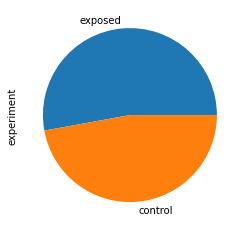

In [22]:
df ['experiment'].value_counts().plot(kind='pie')

# The distribution shows that the number of users in the exposed category were more than the control category


<AxesSubplot:ylabel='device_make'>

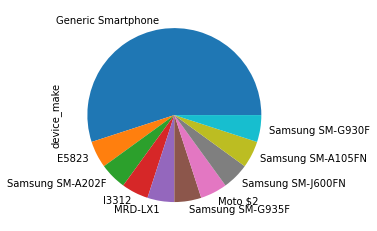

In [23]:
df['device_make'].head(20).value_counts().plot(kind='pie')

# Several different models of samsung phones were used but generic smartphones were the most frequent

<AxesSubplot:>

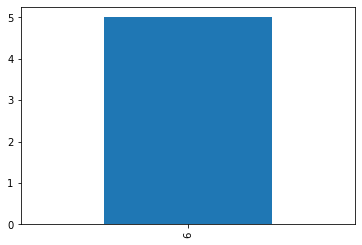

In [24]:
df['platform_os'].head().value_counts().plot(kind='bar')


# Most viewers of the ad were android users

<AxesSubplot:>

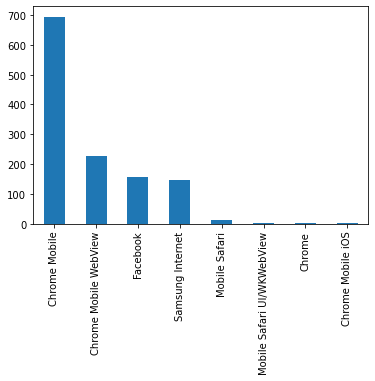

In [25]:
df['browser'].value_counts().plot(kind='bar')

# Checking data formats

In [26]:
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

# Grouping users by hour

<AxesSubplot:xlabel='hour,hour'>

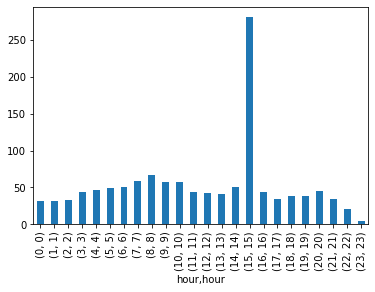

In [27]:
hour_groups = df.groupby('hour')
hour_groups['hour'].value_counts().plot(kind='bar')

# Grouping Users by day

<AxesSubplot:xlabel='date,date'>

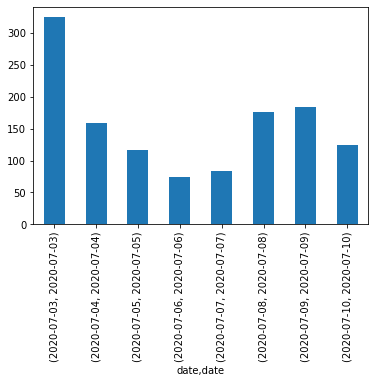

In [28]:
day_groups = df.groupby('date')
day_groups['date'].value_counts().plot(kind='bar')

# Bivariate Analysis
DATE VS HOUR PLOT

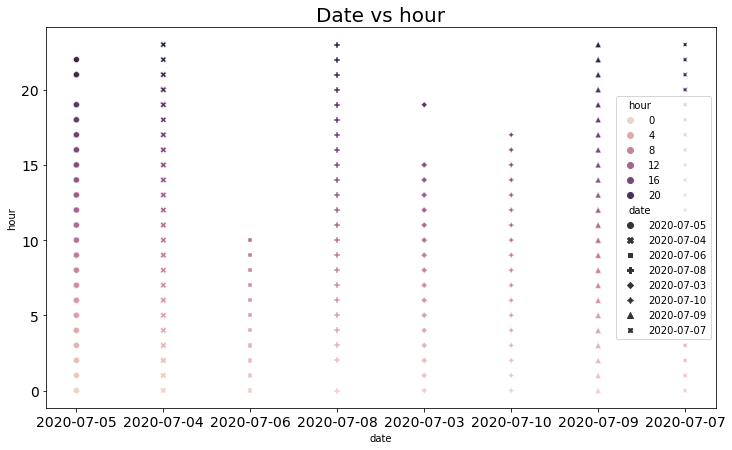

In [29]:
from eda_plot import Plot
plot = Plot()
plot.plot_scatter(df, 'date', 'hour', 'Date vs hour', 'hour','date')

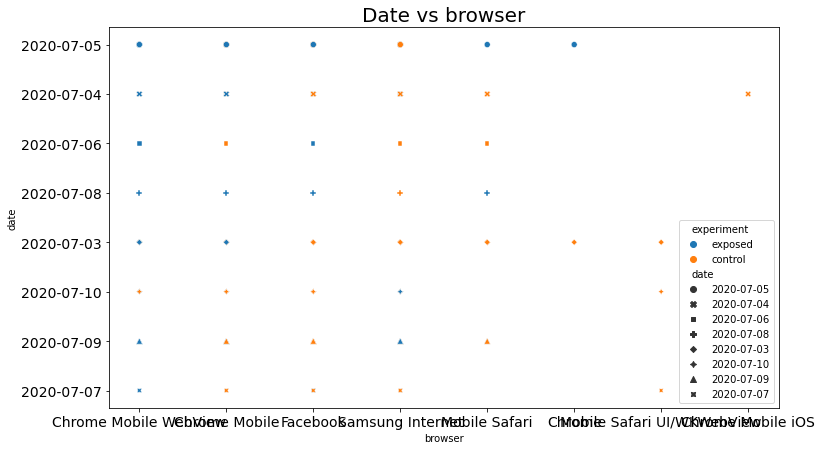

In [30]:
plot.plot_scatter(df, 'browser', 'date', 'Date vs browser', 'experiment','date')

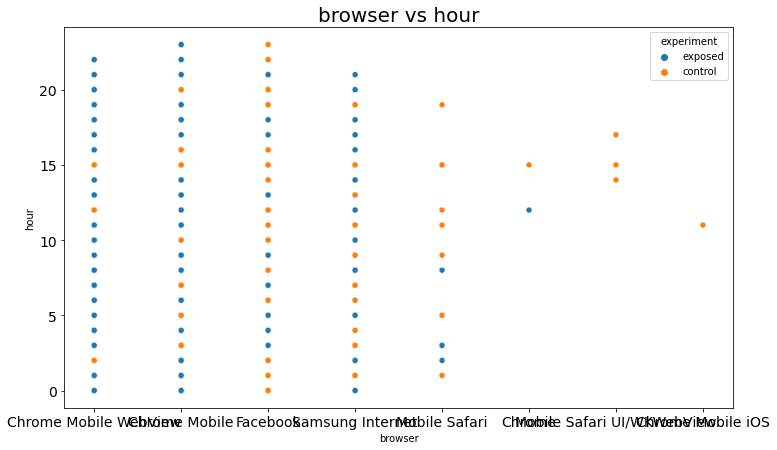

In [31]:
plot.plot_scatter(df, 'browser', 'hour', 'browser vs hour', 'experiment', None)


*** this is where Meserat's code ends

### 2.b.
### 2.1. Counting unique values of categorical variables

The categorical variables that we have in this dataframe are:
<br>
<li>'experiment'
<li>'platform_os'
<li>'yes'
<li>'no'

In [48]:
# count values of the 'experiment' column

raw[['experiment']].value_counts()

experiment
control       4071
exposed       4006
dtype: int64

There were more responses recorded from the control experiment than from the exposed experiment.

In [49]:
# count values of the 'platform_os' column

raw[['platform_os']].value_counts()

platform_os
6              7648
5               428
7                 1
dtype: int64

There were more responses recorded from the android os platform (#6) than from the apple os (#5) or from the windows os (#7)

In [47]:
# count values of the response ('yes' and 'no') columns

raw[['yes', 'no']].value_counts()

yes  no
0    0     6834
     1      671
1    0      572
dtype: int64

More than half of the responses recorded are unusable (recorded *both* yes and no responses)<br>
Of the usable responses; there were more 'no' responses(671) recorded than 'yes' resonses(572).

### 2.2. Plots
#### 2.2.1. Histograms

Conducting histograms on each variable on the dataframe to get a feel for their distribution (except auction_id bc it's a unique identifier for each response recorded)

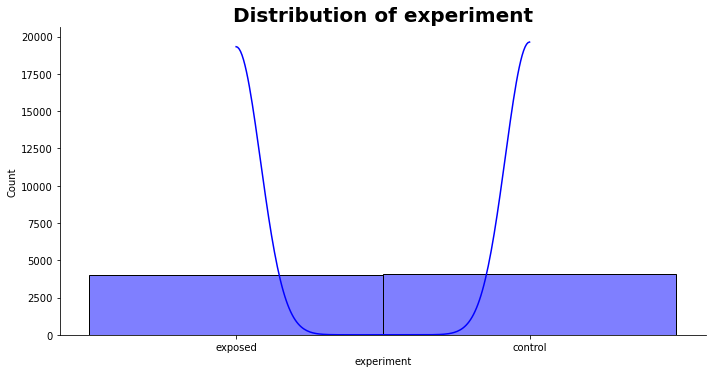

In [50]:
# histogram of 'experiment' column

VisualiseDf.plot_hist(raw,'experiment','blue')

Of the responses recorded, those who were in the control group (those who received a dummy ad) were slightly more than those in the exposed group (those who received a real ad).

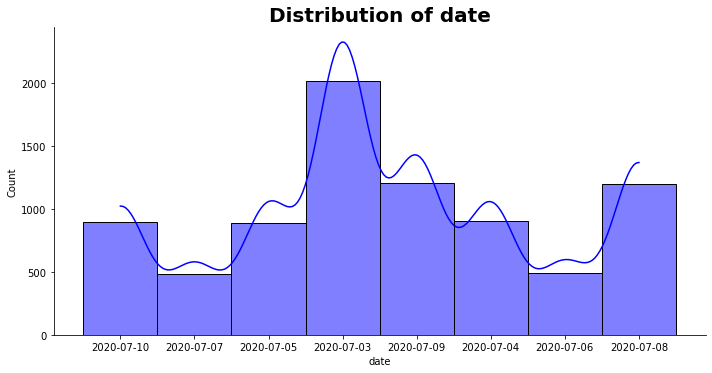

In [51]:
# histogram of 'date' column

VisualiseDf.plot_hist(raw,'date','blue')

This shows that the experiment was spread out over 8 days, with the 4th day(2020-07-03) recording the most responses. 

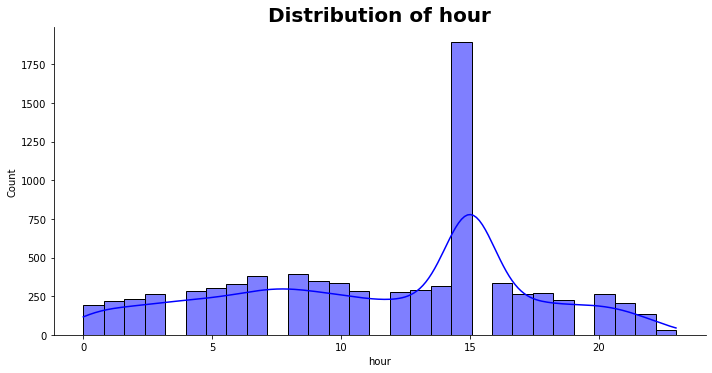

In [52]:
# histogram of 'hour' column

VisualiseDf.plot_hist(raw,'hour','blue')

Most of the experiments recorded responses during the 15th hour of the day (3pm).

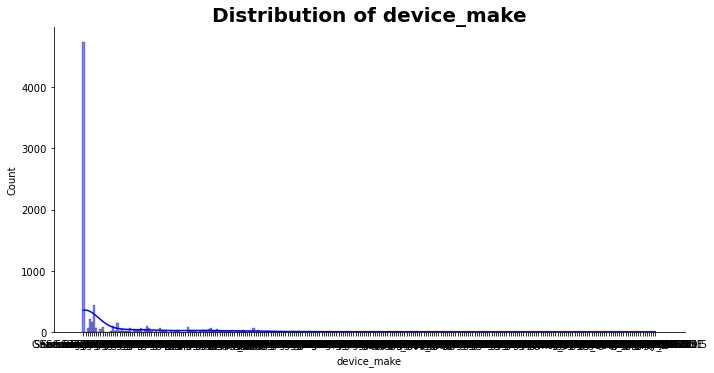

In [53]:
# histogram of 'device_make' column

VisualiseDf.plot_hist(raw,'device_make','blue')